<a href="https://colab.research.google.com/github/RyanXHF/ml_finished_projects/blob/main/ml_car_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from datetime import datetime

# LEITURA DOS DADOS

In [2]:
url = 'https://raw.githubusercontent.com/RyanXHF/ml_car_prices/main/car-prices.csv'  # Use raw content URL
db = pd.read_csv(url)
db

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,no
9996,9996,13246,2002,107424.63,yes
9997,9997,13018,2014,93856.99,no
9998,9998,10464,2011,51250.57,yes


# PRE PROCESSAMENTO DE DADOS

## RENOMEANDO COLUNAS

In [58]:
mapa = {"mileage_per_year": "km_por_ano",
        "model_year": "ano_do_modelo",
        "price": "preco",
        "sold": "vendido"}

db = db.rename(columns=mapa)
db

,Unnamed: 0,km_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,no
9996,9996,13246,2002,107424.63,yes
9997,9997,13018,2014,93856.99,no
9998,9998,10464,2011,51250.57,yes


In [59]:
db["km_por_ano"] = db.km_por_ano * 1.60934 # converte milhas em km
troca = {'yes': 1,
         'no': 0} # converte sim/nao em 1/0

db['vendido'] = db.vendido.map(troca) # realiza a conversão sim/nao em 1/0
db

,Unnamed: 0,km_por_ano,ano_do_modelo,preco,vendido
0,0,35085.22134,2000,30941.02,1
1,1,12622.05362,1998,40557.96,1
2,2,11440.79806,2006,89627.50,0
3,3,43167.32682,2015,95276.14,0
4,4,12770.11290,2014,117384.68,1
...,...,...,...,...,...
9995,9995,25060.64248,2006,97112.86,0
9996,9996,21317.31764,2002,107424.63,1
9997,9997,20950.38812,2014,93856.99,0
9998,9998,16840.13376,2011,51250.57,1


## CRIANDO NOVAS COLUNAS

In [60]:
ano_atual = datetime.today().year
db['idade_do_modelo'] = ano_atual - db.ano_do_modelo
db.head()

,Unnamed: 0,km_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,35085.22134,2000,30941.02,1,24
1,1,12622.05362,1998,40557.96,1,26
2,2,11440.79806,2006,89627.50,0,18
3,3,43167.32682,2015,95276.14,0,9
4,4,12770.11290,2014,117384.68,1,10


## SEPARAÇÃO DE FEATURES E CLASSES

In [61]:
x = db[["km_por_ano","idade_do_modelo","preco"]] # Features
x

,km_por_ano,idade_do_modelo,preco
0,35085.22134,24,30941.02
1,12622.05362,26,40557.96
2,11440.79806,18,89627.50
3,43167.32682,9,95276.14
4,12770.11290,10,117384.68
...,...,...,...
9995,25060.64248,18,97112.86
9996,21317.31764,22,107424.63
9997,20950.38812,10,93856.99
9998,16840.13376,13,51250.57


In [62]:
y = db["vendido"] # Classes
y

0       1
1       1
2       0
3       0
4       1
       ..
9995    0
9996    1
9997    0
9998    1
9999    0
Name: vendido, Length: 10000, dtype: int64

## VERIFICANDO BALENCEAMENTO

In [63]:
db["vendido"].value_counts()

vendido
1    5800
0    4200
Name: count, dtype: int64

# MODELO CLASSIFICADOR

## SELEÇÃO DOS DADOS PARA TREINO

CLASSIFICAÇÃO BINARIA
* CLASSES (Y) -> bought(1/0) -> CLASSIFICAÇÃO BINARIA
* FEATURE NÃO DEFINE SE CLASSE É BINARIA


- CONSTRUÇÃO DO MODELO MACHINE LEARNING
   * TREINO 75% DADOS -> FIT
   * TESTE 25% -> ACURACIA

In [64]:
# Separar treino e teste
seed = 42
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=seed, stratify=y)

print('Treinamento com %d elementos e testarmos com %d elementos' % (len(train_x), len(test_x)))

Treinamento com 7500 elementos e testarmos com 2500 elementos


## TESTE 1 - LINEAR SVC

In [65]:
model = LinearSVC() # Cria o modelo
model.fit(train_x, train_y) # treino

result = model.predict(test_x) # teste

acuracia = accuracy_score(test_y, result) # compara vetores
acuracia_model = model.score(test_x, test_y) # roda teste

print("Acuracia: ", (acuracia*100), "%")
print("Acuracia_model: ", (acuracia_model*100), "%")

Acuracia:  48.64 %
Acuracia_model:  48.64 %


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## TESTE 2 - DUMMY (BASELINE)

In [66]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(train_x, train_y)
acuracia_dummy = dummy_stratified.score(test_x, test_y)

print("Acuracia Dummy: ", (acuracia_dummy*100), "%")

Acuracia Dummy:  57.99999999999999 %


## TESTE 3 - SVC e StandardScale

In [67]:
# Separar treino e teste
seed = 42
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=seed, stratify=y)

print('Treinamento com %d elementos e testarmos com %d elementos' % (len(raw_train_x), len(raw_test_x)))

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x_normalizado = scaler.transform(raw_train_x)
test_x_normalizado = scaler.transform(raw_test_x)

Treinamento com 7500 elementos e testarmos com 2500 elementos


In [68]:
model = SVC(gamma = "auto", random_state=seed) # Cria o modelo
model.fit(train_x_normalizado, train_y) # treino

result = model.predict(test_x_normalizado) # teste

acuracia = accuracy_score(test_y, result) # compara vetores

print("Acuracia: ", (acuracia*100), "%")

Acuracia:  76.03999999999999 %


## TESTE 4 - ARVORE DECISÂO

In [69]:
from sklearn.tree import DecisionTreeClassifier

seed = 42

print('Treinamento com %d elementos e testarmos com %d elementos' % (len(raw_train_x), len(raw_test_x)))

model = DecisionTreeClassifier(max_depth=3, random_state=seed) # Cria o modelo
model.fit(raw_train_x, train_y) # treino

acuracia = accuracy_score(test_y, result) # compara vetores

print("Acuracia: ", (acuracia*100), "%")

Treinamento com 7500 elementos e testarmos com 2500 elementos
Acuracia:  76.03999999999999 %


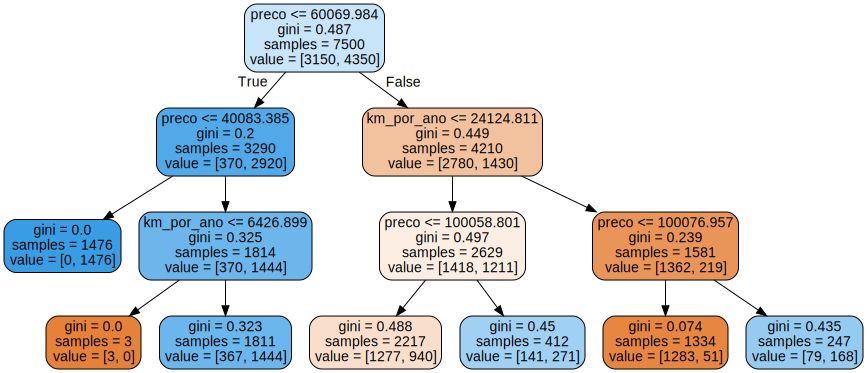

In [70]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, out_file=None, filled=True, feature_names=features, rounded=True)
graph = graphviz.Source(dot_data)
graph